# A6: Presentaciones intermedias 
#### Andrés Adrián Yarte Villaseñor
#### A0082935

https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%ls datasets/

adult.csv                                    cwurData.csv
adultos_vac_tab_ensanut2020_w.Catálogo.xlsx  data.csv
airline_data.csv                             headbrain.csv
antropometria00.csv                          mic2.xlsx
antropometria-dataset-1.csv                  mic.xlsx
antropometria-dataset-2.csv                  movies.csv
antropometria-dataset.csv                    nhanes_2015_2016.csv
Book3.csv                                    pokemon.csv
Canada.xlsx                                  reg_data.csv
Cartwheeldata.csv                            sample_pivot.csv
census.csv                                   tips.csv
coches.csv                                   weight-height.csv


In [3]:
df = pd.read_csv("Olympics.csv")

### Description of Dataset

I got this dataset from the webpage kaggle.com, it represents 120 years of Olympic history. I only included the years 1998 to 2016.

### My variables of interest
`Name` - It represents the names of the athletes, this is a nominal variable.
`NOC` - It represents the origin of the athletes, this is a categorical variable.
`Medal` - It represents the medal won by the athlete, this is a ordinal variable.
`Year` - It represents the year the athlete competed, this is a numeric variable.
`Age` - It represents the age of the athlete, this is a numeric variable.
`Sport` - Represents the sport the athlete competed on, this is a categorical variable.

In [4]:
#df.set_index('ID', inplace = True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
1,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
2,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN
3,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,88863.000000,88858.000000,88068.000000,87567.000000,88863.000000
mean,69044.646219,25.807007,175.780579,71.123892,2007.612055
std,39180.843245,5.416860,10.908530,15.220238,5.701500
min,2.000000,12.000000,133.000000,28.000000,1998.000000
25%,35507.500000,22.000000,168.000000,60.000000,2004.000000
50%,69239.000000,25.000000,175.000000,70.000000,2008.000000
75%,102897.000000,29.000000,183.000000,80.000000,2012.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


## 1. Which olimpic team has had the most Medals

In [6]:

df.drop(['Sex','Games','City','Season','Age','Height','Weight','Team','Year','Sport','Event','ID'],
        axis = 1,
        inplace = True
       )

In [7]:
df.head()

,Name,NOC,Medal
0,A Lamusi,CHN,NaN
1,Antti Sami Aalto,FIN,NaN
2,Jyri Tapani Aalto,FIN,NaN
3,Minna Maarit Aalto,FIN,NaN
4,Juhamatti Tapio Aaltonen,FIN,Bronze


In [8]:
table = pd.pivot_table(df, values='Name', index=['NOC'], columns='Medal', aggfunc=pd.Series.nunique, margins=True)
table

Medal,Bronze,Gold,Silver,All
NOC,,,,
AFG,1.0,NaN,NaN,1
ALG,4.0,2.0,3.0,8
ARG,45.0,69.0,32.0,122
ARM,9.0,1.0,4.0,13
AUS,209.0,155.0,211.0,469
...,...,...,...,...
UZB,14.0,7.0,6.0,26
VEN,5.0,1.0,1.0,7
VIE,NaN,1.0,3.0,3


In [9]:
table = table.reindex(table.sort_values(by='All',ascending=False).index)
table.head(10)

Medal,Bronze,Gold,Silver,All
NOC,,,,
All,3891.0,3214.0,3613.0,8929
USA,374.0,501.0,441.0,1066
RUS,327.0,270.0,263.0,715
GER,271.0,233.0,208.0,562
AUS,209.0,155.0,211.0,469
CHN,169.0,198.0,169.0,435
CAN,159.0,181.0,134.0,412
FRA,140.0,111.0,153.0,347
GBR,125.0,134.0,138.0,327


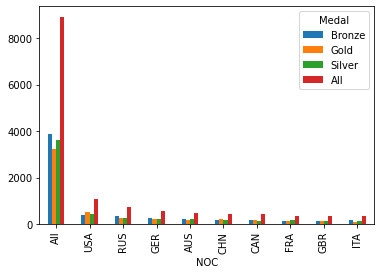

In [10]:
table.head(10).plot.bar()

In [11]:
tb = table.transpose()
tb.drop(['All'],
        axis = 1,
        inplace = True
       )
table = tb.transpose()

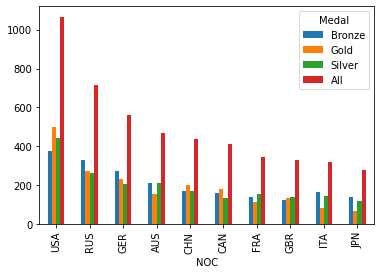

In [12]:
table.head(10).plot.bar()

In [13]:
table = table.head(10)
table

Medal,Bronze,Gold,Silver,All
NOC,,,,
USA,374.0,501.0,441.0,1066.0
RUS,327.0,270.0,263.0,715.0
GER,271.0,233.0,208.0,562.0
AUS,209.0,155.0,211.0,469.0
CHN,169.0,198.0,169.0,435.0
CAN,159.0,181.0,134.0,412.0
FRA,140.0,111.0,153.0,347.0
GBR,125.0,134.0,138.0,327.0
ITA,164.0,84.0,146.0,321.0


To determine which olympic team has the most medals from 1998 to 2016, first I need to drop all columns that are not needed. Only the variables `Name`, `NOC`, and `Medal` are kept. Next step is creating a pivot table showing the different types of medals won by each country and their total.I had a problem with my table because when I sorted the values to find the top countries I found that there was a country named All which was the sum of every country's medals into one. I had to transpose the table and delete this column. After cleaning up the data and keeping only the top 10 we can see that the country with the most medals from 1998 to 2016 is USA. It beats Russia by 351 medals.

### 2. Participants from USA, Russia and Germany 

In [14]:
df = pd.read_csv("Olympics.csv")

In [15]:
df.drop(['ID',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'Games',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal'],
        axis = 1,
        inplace = True
       )

In [16]:
df

,Name,NOC,Year
0,A Lamusi,CHN,2012
1,Antti Sami Aalto,FIN,2002
2,Jyri Tapani Aalto,FIN,2000
3,Minna Maarit Aalto,FIN,2000
4,Juhamatti Tapio Aaltonen,FIN,2014
...,...,...,...
88858,Olga Igorevna Zyuzkova,BLR,2016
88859,Piotr ya,POL,2014
88860,Piotr ya,POL,2014
88861,Tomasz Ireneusz ya,POL,1998


In [17]:
table = pd.pivot_table(df, values='Name', index=['NOC'], columns='Year', aggfunc='count', margins = True)
table = table.reindex(table.sort_values(by='All',ascending=False).index)

In [18]:
tb = table.transpose()
tb.drop(['All'],
        axis = 1,
        inplace = True
       )
table = tb.transpose()

In [19]:
table = table.head(3)
table.drop(['All'],
        axis = 1,
        inplace = True
       )


In [20]:
table

Year,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
NOC,,,,,,,,,,
USA,284.0,764.0,313.0,726.0,325.0,763.0,341.0,689.0,367.0,719.0
RUS,197.0,602.0,240.0,593.0,283.0,600.0,279.0,549.0,353.0,406.0
GER,217.0,567.0,259.0,592.0,263.0,558.0,259.0,510.0,271.0,536.0


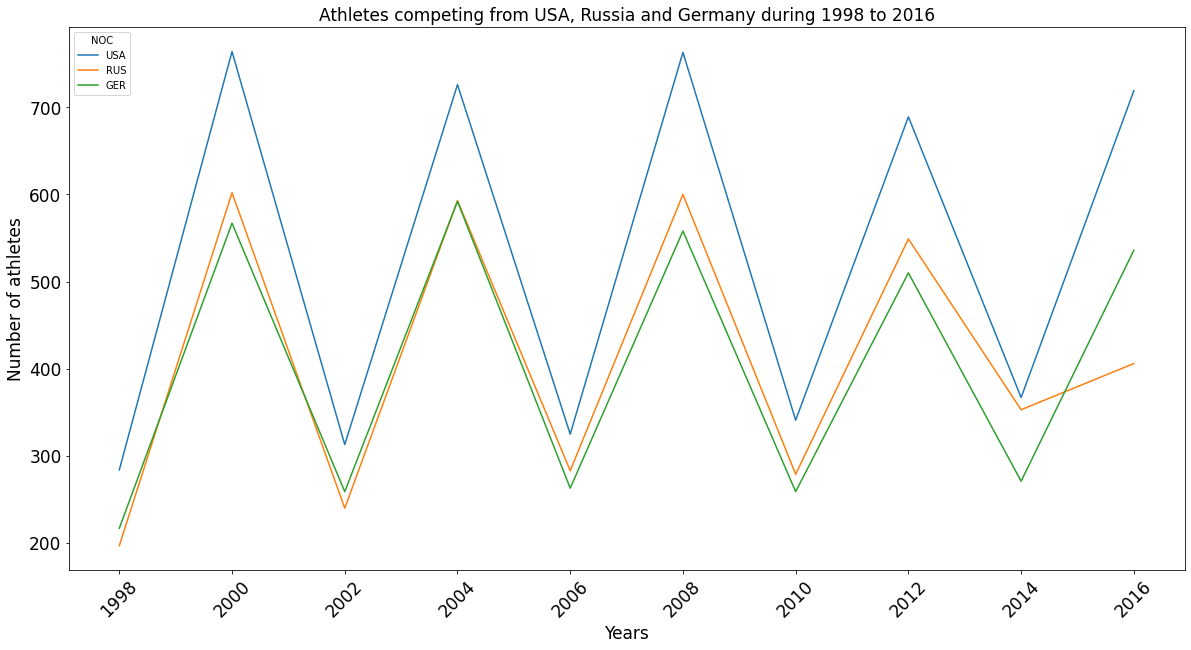

In [21]:
table.transpose().plot(figsize = (20,10))
plt.xlabel('Years', fontsize = 17)
plt.xticks(fontsize = 17, rotation = 45)
plt.xticks(np.arange(1998, 2018, step=2))
plt.ylabel('Number of athletes', fontsize = 17)
plt.yticks(fontsize = 17)
plt.title('Athletes competing from USA, Russia and Germany during 1998 to 2016', fontsize = 17)
plt.show()

To analyze the number of participants from USA, Russia and Germany I first need to import my database once again and remove all columns except for `Name`, `NOC`, and `Year`. These variables are then used in a pivot table which shows the number of participants per year from 1998 to 2016 for the three countries. On the previos graph shown we can see that the amount of participants fluctuates between the winter and summer olympics. This fluctuation is explained by the Winter Olympics hosting less events than the Summer Olympics.

### 3. What is the Olympic athelete age average, upper extreme and lower extreme


In [22]:
df = pd.read_csv("Olympics.csv")

In [23]:
df['Age'].mean()

25.807006684822976

In [24]:
df['Age'].var()

29.342374350225974

In [25]:
df['Age'].std()

5.416860192973968

In [26]:
m1=df["Age"].max()
m1

71.0

In [27]:
m2=df["Age"].min()
m2

12.0

In [28]:
range=m1-m2
range

59.0

In [29]:
Q1=df["Age"].quantile(0.25)
Q1

22.0

In [30]:
Q3=df["Age"].quantile(0.75)
Q3

29.0

In [31]:
IQR=Q3-Q1
IQR

7.0

In [32]:
df["Age"].describe()


count    88858.000000
mean        25.807007
std          5.416860
min         12.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         71.000000
Name: Age, dtype: float64

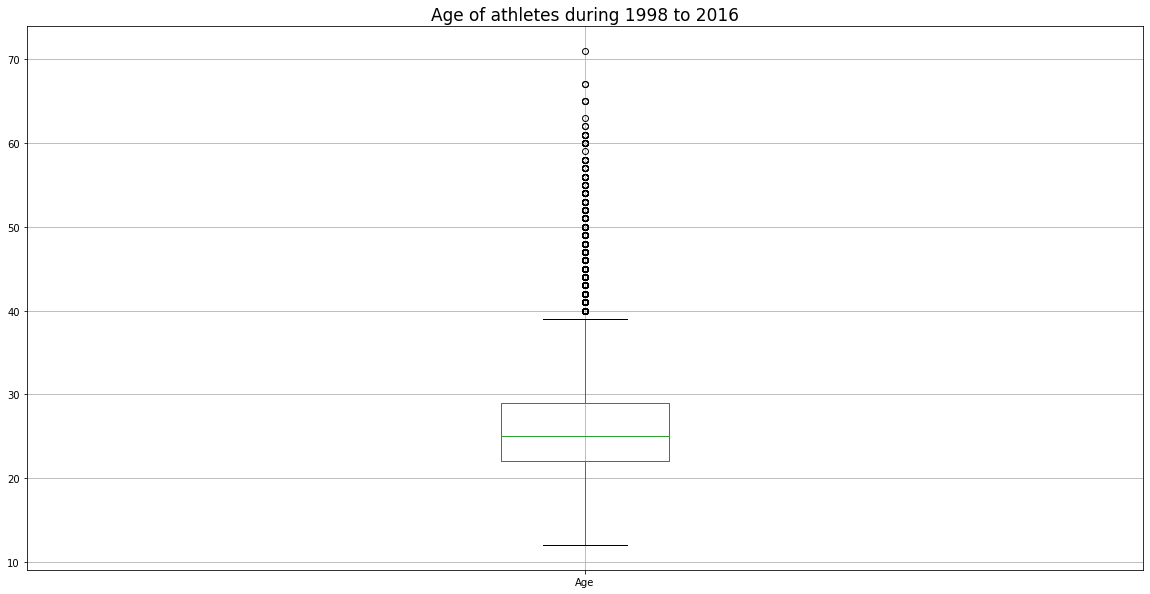

In [33]:
df.boxplot(column="Age",figsize = (20,10))
plt.title('Age of athletes during 1998 to 2016', fontsize = 17)
plt.show()

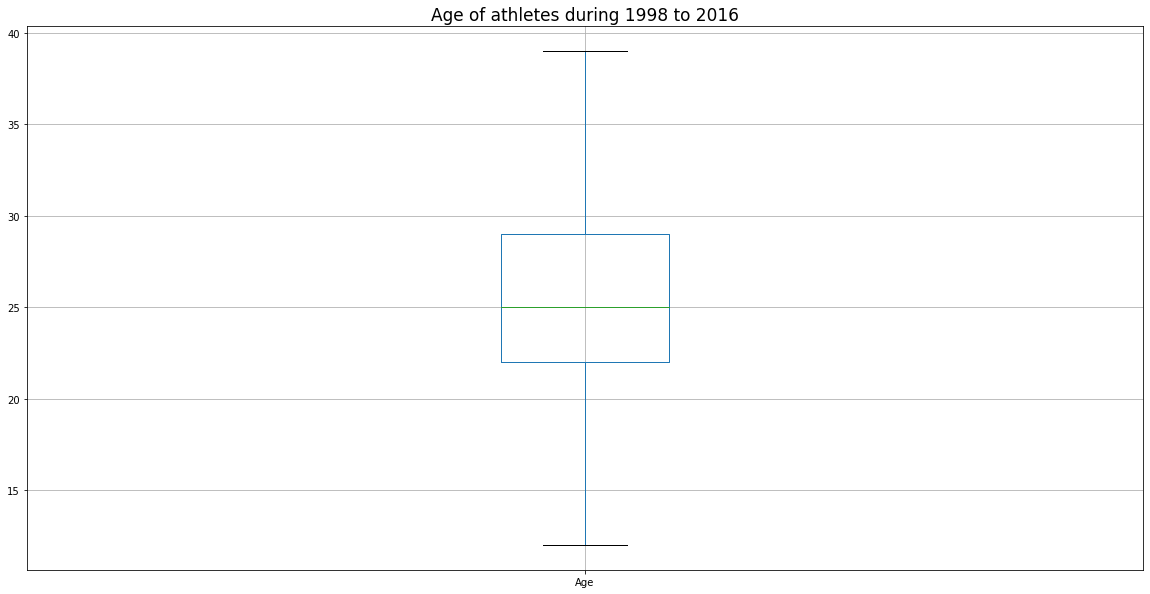

In [34]:
df.boxplot(column="Age",figsize = (20,10),showfliers = False)
plt.title('Age of athletes during 1998 to 2016', fontsize = 17)
plt.show()

In [35]:
#LOWER EXTREME
Q1 - (1.5* IQR)

11.5

In [36]:
#UPPER EXTREME
Q3 + (1.5* IQR)

39.5

The final step of my work is analyzing the ages of the athletes. I import my database again and calculate the mean, variance, standard deviation, maximum value, minimum value, range, the lower quartile, the upper quartile and the inter quartile range. Using a box plot I can see the distribution of the values and see the outliers in my data. I calculated the lower and upper extremes. This shows me that the outliers are all ages above 39.5. With the average of athletes being around 25 years old. This age is the average in which most athletes are in peak condition and is why the older athletes are outliers in the data.

### 4. Which are the 10 most common sports

In [37]:
df = pd.read_csv("Olympics.csv")

In [38]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
1,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
2,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN
3,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [39]:
df.drop(['ID',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'Games',
 'Season',
 'City',
'NOC', 'Year',
 'Event',
 'Medal'],
        axis = 1,
        inplace = True
       )

In [40]:
df.head()

,Name,Sport
0,A Lamusi,Judo
1,Antti Sami Aalto,Ice Hockey
2,Jyri Tapani Aalto,Badminton
3,Minna Maarit Aalto,Sailing
4,Juhamatti Tapio Aaltonen,Ice Hockey


In [41]:
table = pd.pivot_table(df, values='Name', index=['Sport'], aggfunc='count', margins=True)
table = table.reindex(table.sort_values(by='Name',ascending=False).index)
tb = table.transpose()
tb.drop(['All'],
        axis = 1,
        inplace = True
       )
table = tb.transpose()
table.head(10)

,Name
Sport,
Athletics,11673
Swimming,8214
Gymnastics,5000
Cross Country Skiing,3809
Cycling,3192
Biathlon,3044
Alpine Skiing,3027
Shooting,2849
Rowing,2783


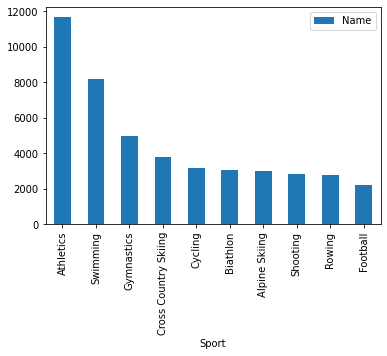

In [42]:
table.head(10).plot.bar()

To analize and find the 10 most common olimpic sports from 1998 to 2016 I first needed to drop all the variables not needed in this analisis, only keeping the name of the athletes and their sports. With these I created a pivot table in which I displayed the sport and the number of athletes that competed in the sport. The results show that the most competed in sport is Athletics, after this swimming, gymnastics and so on. The top 3 sports on this list are all sports with different categories such as swimming wich has 50 meters 200 meters along with others. The same applies to Athletics and gymnastics making them the most common sports in the olympics.

### 5. Which athlete has competed in the most olympic events

In [50]:
table = pd.pivot_table(df, values='Sport', index=['Name'], aggfunc='count', margins=True)
table = table.reindex(table.sort_values(by='Sport',ascending=False).index)
tb = table.transpose()
tb.drop(['All'],
        axis = 1,
        inplace = True
       )
table = tb.transpose()
table.head(10)

,Sport
Name,
"Michael Fred Phelps, II",30
Fabian Hambchen,26
Yang Wei,26
Ole Einar Bjrndalen,24
Daniele Matias Hyplito,24
Marian Drgulescu,24
Alberto Busnari,24
Dimitri Karbanenko,23
Enrico Pozzo,22


To answer this question I had to reverse what I did for the previous question, I used a pivot table to get the data of the athletes who have competed on the most events. I used the names of these athletes as the index for which i could count the values of sport to find the number of times they have competed. I then sort the values from biggest to smallest. The result was Michael Phelps as the athlete who has competed in the most events, competing in 30 events total.